Confusion Matrix:
[[ 10  73]
 [ 88 829]]
Accuracy: 0.839	Precision: 0.919
Recall: 0.904	Specificity: 0.120
F Score: 0.911


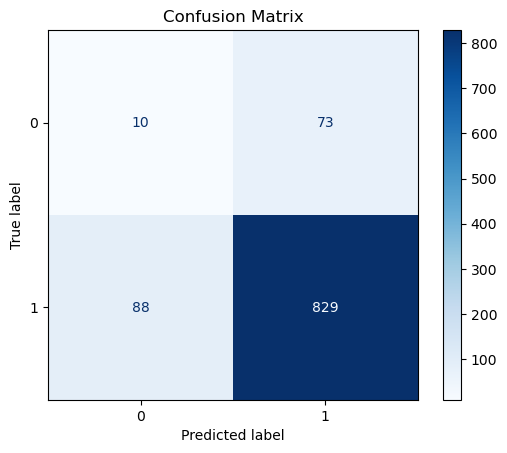

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Generate random binary labels
n = 1000
true_value = np.random.binomial(1, 0.9, size=n)
predicted = np.random.binomial(1, 0.9, size=n)

# Compute confusion matrix
cf = confusion_matrix(true_value, predicted)

# Calculate evaluation metrics
accuracy = accuracy_score(true_value, predicted)
precision = precision_score(true_value, predicted)
recall = recall_score(true_value, predicted)
specificity = recall_score(true_value, predicted, pos_label=0)  # Specificity calculation
f_score = f1_score(true_value, predicted)

# Print metrics and confusion matrix
print(f"Confusion Matrix:\n{cf}")
print(f"Accuracy: {accuracy:.3f}\tPrecision: {precision:.3f}")
print(f"Recall: {recall:.3f}\tSpecificity: {specificity:.3f}")
print(f"F Score: {f_score:.3f}")

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=['0', '1'])
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


[[6 4]
 [3 7]]
Predicted  0   1  All
Actual               
0          6   4   10
1          3   7   10
All        9  11   20


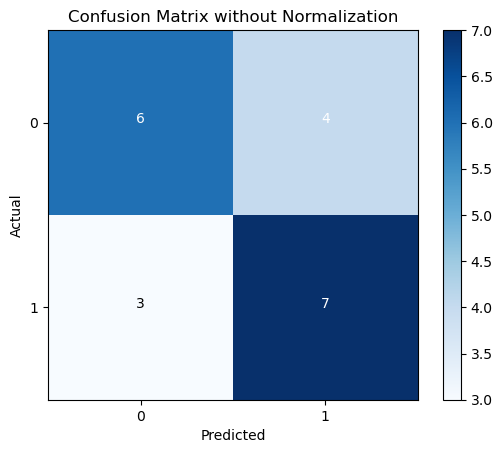

In [2]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

trueValue = [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]
predicted = [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
cf = confusion_matrix(trueValue, predicted)
print(cf)

exp_series = pd.Series(trueValue)
pred_series = pd.Series(predicted)
cross_tab = pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(cross_tab)

plt.imshow(cf, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar() 
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')

tick_marks = np.arange(len(set(trueValue)))
class_labels = ['0', '1']
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

thresh = cf.max() / 2.
for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j, i, format(cf[i, j], 'd'), horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
